# Author : Reena Kumari

# Stock Market Prediction using Numerical Analysis

# Introduction
Stock market prediction is the act of trying to determine the future value of a company stock or other financial istrument traded on an exchange.the sucessful prediction of a stock's future price could yield significant profit.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing the training data
training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
# input/ouputs of recurrent neural (input != date, stock price)
# but stock price at time t for input, and stock price t+1 for the output
# create a set only with the "Open" Google stock price, extract that column
# two-dimensional numpy array

training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [4]:
# Feature Scaling + Normalization, since LSTM Several Sigmoid Activation function
# Sigmoid 0 and 1, as is the case in Normalization

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))

# Fitting to training_set, scale training set, 
# transform we'll apply normalizationjust need min and max for normalization

training_data = mm.fit_transform(training_data)


In [5]:
# Getting the inputs and outputs,y_train is output, x_train is the input

x_train = training_data[0:1257]
y_train = training_data[1:1258]

print(x_train.shape)
print(y_train.shape)

(1257, 1)
(1257, 1)


In [6]:
# Reshaping inputs, input has a certain format (2D array, features)
# Changing the format of x_train into a 3D array, with a timestep
# Keras Documentation - why reshape? - 3D tensor with shape (batch_size, timesteps)
# time steps different between output and input time, input_dim dimension of input feature

x_train = np.reshape(x_train, (1257, 1, 1))

print(x_train.shape)

(1257, 1, 1)


# What is a Recurrent Neural Network?
A Recurrent Neural Network works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.

Below is how you can convert a Feed-Forward Neural Network into a Recurrent Neural Network:



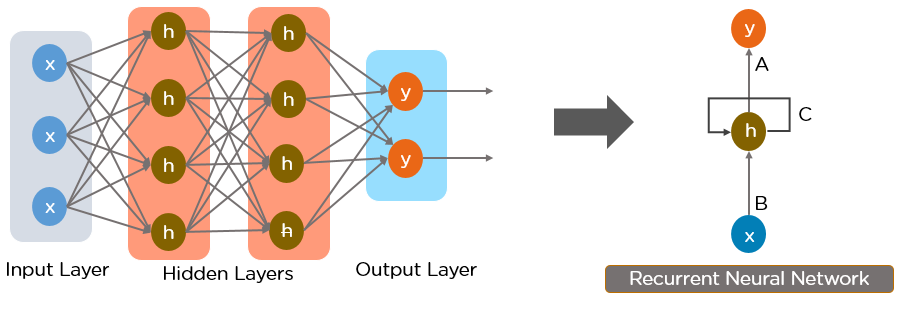

The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.



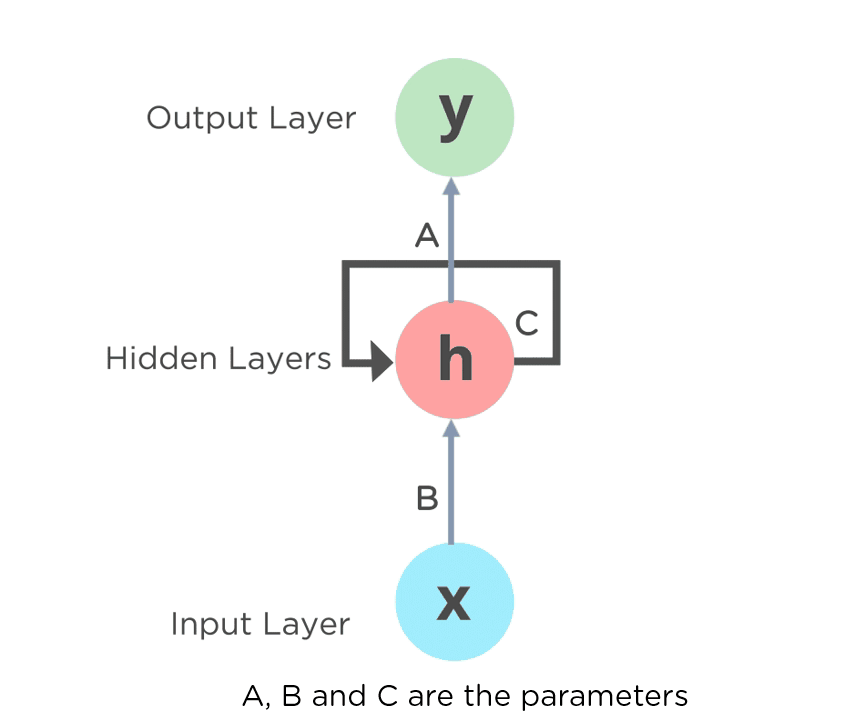

# Long Short-Term Memory Networks
LSTMs are a special kind of Recurrent Neural Network — capable of learning long-term dependencies by remembering information for long periods is the default behavior.

All recurrent neural networks are in the form of a chain of repeating modules of a neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

# LSTM Use Case
Now,let’s do a practical implementation to predict the prices of stocks using the “Google stock price” data.

Based on the stock price data between 2012 and 2016, we will predict the stock prices of 2017.

In [49]:
# importing the keras libraries and packages

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [8]:
import tensorflow as tf  # Importing the TensorFlow Library
from tensorflow import keras  # Import Keras from TensorFlow

from tensorflow.keras import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Stock Prediction Model

In [9]:
# initializing the model
model = Sequential()

# adding the input layer and the LSTM layer
model.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# adding the output layer
model.add(Dense(units = 1))

# compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# fitting the RNN to the training data
model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
40/40 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 2/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0728
Epoch 3/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0691
Epoch 4/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0659
Epoch 5/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 6/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 7/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0571
Epoch 8/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0543
Epoch 9/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0516
Epoch 10/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0488
Epoch 11/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0462
Epoch 12/200
40/40 [==============================] - 0s 2ms/step - loss: 0.0435
Epoch 13/200
40/40 [=================

Epoch 99/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5156e-04
Epoch 100/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5235e-04
Epoch 101/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5087e-04
Epoch 102/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5132e-04
Epoch 103/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5061e-04
Epoch 104/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5364e-04
Epoch 105/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5276e-04
Epoch 106/200
40/40 [==============================] - 0s 2ms/step - loss: 2.4993e-04
Epoch 107/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5109e-04
Epoch 108/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5571e-04
Epoch 109/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5409e-04
Epoch 110/200
40/40 [==============================] - 

40/40 [==============================] - 0s 2ms/step - loss: 2.5111e-04
Epoch 195/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5263e-04
Epoch 196/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5221e-04
Epoch 197/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5237e-04
Epoch 198/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5589e-04
Epoch 199/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5158e-04
Epoch 200/200
40/40 [==============================] - 0s 2ms/step - loss: 2.5334e-04


In [39]:
# getting the real stock of 2017 i.e., importing the test dataset

test_data = pd.read_csv('Google_Stock_Price_Test.csv')


In [40]:
test_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [41]:
real_stock_price = test_data.iloc[:,1:2]
real_stock_price.head()


,Open
0,778.81
1,788.36
2,786.08
3,795.26
4,806.40


In [42]:
# getting the predicted stock price of 2017

inputs = real_stock_price
inputs = mm.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))


predicted_stock_price = model.predict(inputs)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)


In [43]:
predicted_stock_price

array([[777.1988 ],
       [786.04016],
       [783.93524],
       [792.3882 ],
       [802.5642 ],
       [803.8912 ],
       [801.29047],
       [803.23694],
       [803.5459 ],
       [803.18243],
       [802.02765],
       [801.39966],
       [803.02783],
       [803.3369 ],
       [816.92883],
       [823.47723],
       [830.75464],
       [828.0063 ],
       [810.05035],
       [793.8553 ]], dtype=float32)

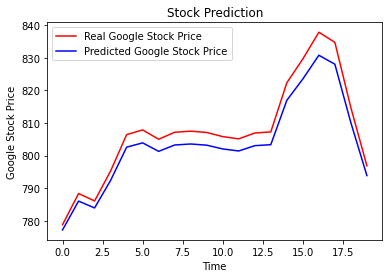

In [44]:
# visualizing the results

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [14]:
# getting the real stock price of 2012 - 2016

training_data = pd.read_csv('Google_Stock_Price_Train.csv')

training_data.shape
training_data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
training_data = training_data.iloc[:, 1:2]

training_data.shape
training_data.head()

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04


In [35]:
# getting the predicted stock price of 2012-2016

predicted_stock_price = model.predict(x_train)
predicted_stock_price = mm.inverse_transform(predicted_stock_price)

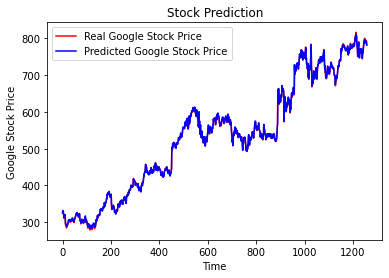

In [36]:
# visualizing the whole training data results

plt.plot(training_data, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [46]:
# Evaluating the RNN model

import math

from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

4.248889157256104
